In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qizhajiaoyi1/IpAddress_to_Country.csv
/kaggle/input/qizhajiaoyi1/04. Fraud_Data.csv


In [2]:
# 读取数据
fraud_data = pd.read_csv("/kaggle/input/qizhajiaoyi1/04. Fraud_Data.csv")
ip_data = pd.read_csv("/kaggle/input/qizhajiaoyi1/IpAddress_to_Country.csv")

# 确保字段是数值型
fraud_data["ip_address"] = pd.to_numeric(fraud_data["ip_address"], errors="coerce")
ip_data["lower_bound_ip_address"] = pd.to_numeric(ip_data["lower_bound_ip_address"], errors="coerce")
ip_data["upper_bound_ip_address"] = pd.to_numeric(ip_data["upper_bound_ip_address"], errors="coerce")

# 按照 ip_address 进行区间匹配
df = pd.merge_asof(
    fraud_data.sort_values("ip_address"),
    ip_data.sort_values("lower_bound_ip_address"),
    left_on="ip_address",
    right_on="lower_bound_ip_address",
    direction="backward"
)

# 只保留落在区间内的
df = df[df["ip_address"] <= df["upper_bound_ip_address"]]

# 查看前几行结果
print(df[["user_id", "ip_address", "country"]].head(10))

# # 保存为新的 CSV 文件
# merged.to_csv("Fraud_Data_with_Country.csv", index=False)
# print("合并完成，已保存为 Fraud_Data_with_Country.csv")

     user_id    ip_address    country
634   247547  1.677886e+07  Australia
635   220737  1.684205e+07   Thailand
636   390400  1.684366e+07      China
637    69592  1.693873e+07      China
638   174987  1.697198e+07   Thailand
639    23204  1.699555e+07      China
640   155230  1.709773e+07   Thailand
641   199369  1.712443e+07      Japan
642   236894  1.713459e+07      Japan
643   379446  1.716216e+07      Japan


In [3]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778240.0,16779263.0,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16809984.0,16842751.0,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843264.0,16843775.0,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16924672.0,16941055.0,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16941056.0,16973823.0,Thailand


In [4]:
df.describe()

,user_id,purchase_value,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address
count,129146.000000,129146.000000,129146.000000,1.291460e+05,129146.000000,1.291460e+05,1.291460e+05
mean,200130.920416,36.932456,33.128413,1.892795e+09,0.094993,1.890950e+09,1.894646e+09
std,115358.923526,18.317798,8.615297,1.085207e+09,0.293207,1.086802e+09,1.083635e+09
min,2.000000,9.000000,18.000000,1.677886e+07,0.000000,1.677824e+07,1.677926e+07
25%,100603.250000,22.000000,27.000000,9.561635e+08,0.000000,9.395241e+08,9.563013e+08
50%,199971.500000,35.000000,33.000000,1.899710e+09,0.000000,1.899708e+09,1.899733e+09
75%,299994.750000,49.000000,39.000000,2.832125e+09,0.000000,2.832073e+09,2.832138e+09
max,400000.000000,154.000000,76.000000,3.758053e+09,1.000000,3.758031e+09,3.758064e+09


In [5]:
df.shape

(129146, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 129146 non-null  int64  
 1   signup_time             129146 non-null  object 
 2   purchase_time           129146 non-null  object 
 3   purchase_value          129146 non-null  int64  
 4   device_id               129146 non-null  object 
 5   source                  129146 non-null  object 
 6   browser                 129146 non-null  object 
 7   sex                     129146 non-null  object 
 8   age                     129146 non-null  int64  
 9   ip_address              129146 non-null  float64
 10  class                   129146 non-null  int64  
 11  lower_bound_ip_address  129146 non-null  float64
 12  upper_bound_ip_address  129146 non-null  float64
 13  country                 129146 non-null  object 
dtypes: float64(3), int64(4)

In [7]:
df.isnull().sum()

user_id                   0
signup_time               0
purchase_time             0
purchase_value            0
device_id                 0
source                    0
browser                   0
sex                       0
age                       0
ip_address                0
class                     0
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [8]:
# if 'class' in df.columns:
print("\n类别分布：")
print(df['class'].value_counts(normalize=True))


类别分布：
class
0    0.905007
1    0.094993
Name: proportion, dtype: float64


In [9]:
 #转换时间
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['time_diff'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds() / 3600  # 小时为单位
df.drop(["signup_time", "purchase_time"], axis=1, inplace=True)

In [10]:
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_diff
634,247547,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,0,16778240.0,16779263.0,Australia,1008.948611
635,220737,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,0,16809984.0,16842751.0,Thailand,342.121389
636,390400,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,0,16843264.0,16843775.0,China,554.870556
637,69592,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,0,16924672.0,16941055.0,China,2122.471389
638,174987,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,0,16941056.0,16973823.0,Thailand,2847.105278


## 从上面的代码中我们了解到
数据总共有151,112条记录，每条都是用户的第一次交易
总共11列特征，涵盖  时间  金额 设备 渠道  浏览器  性别  年龄  IP  和要预测的欺诈class

## 数据中没用缺失值
signup_time purchase_time目前是object，但是我已经转换成datetime
ipaddress 是float，但是应该转为int类型

## 类别分布
正常交易 class=0 约90.6%
欺诈交易 class=1 约9.4%
数据严重不平衡

## 数值特征的统计特征
交易金额purchase_value 最小值为9 最大值为154 平均约37美元，欺诈交易 是否与高金额相关，需要进一步分布对比

年龄 范围在18到76岁 平均约33 欺诈者可能集中在某些年龄段

注册到交易时间： time_diff 例如id为1395的用户只间隔了0.00027小时（约1秒）就完成了注册和购买，这种很有可能是欺诈
正常用户购买可能是几小时到几天之隔

# 初步可疑特征
注册-购买时间差：非常短的时间差可能是欺诈信号。

来源渠道 (source)：比如 Ads 过来的用户，往往欺诈率更高。

浏览器 (browser)：冷门浏览器可能异常。

IP 地址 (ip_address)：需要映射到国家，再分析地理分布。

In [11]:
sns.set(style="whitegrid", palette="Set2")

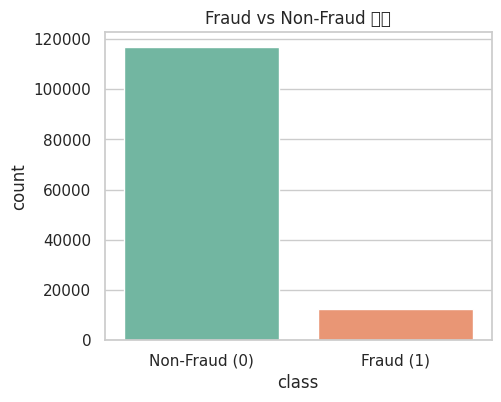

In [12]:
# ===== 1. 类别分布 =====
plt.figure(figsize=(5,4))
sns.countplot(x='class', data=df)
plt.title("Fraud vs Non-Fraud 分布")
plt.xticks([0,1], ["Non-Fraud (0)", "Fraud (1)"])
plt.show()

类别不平衡

结论：数据严重不平衡，建模时要避免只学会“全预测为0”的情况，因此需要用 AUC、Recall、PR-AUC 来评估，而不是仅看 Accuracy。

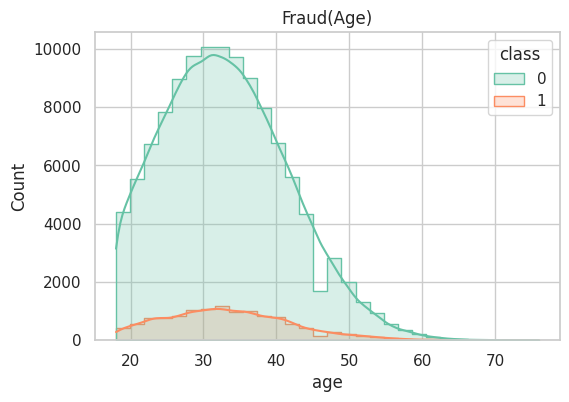

In [13]:
# ===== 2. 年龄分布 =====
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='class', bins=30, kde=True, element="step")
plt.title("Fraud(Age)")
plt.show()

欺诈用户和正常用户的年龄分布大体相似，主要集中在 25~40 岁。

欺诈用户在 30 岁左右 略多一些。

👉 结论：年龄可能是弱特征，单独区分度不强，但可以和其他特征（如渠道、时间差）组合使用。

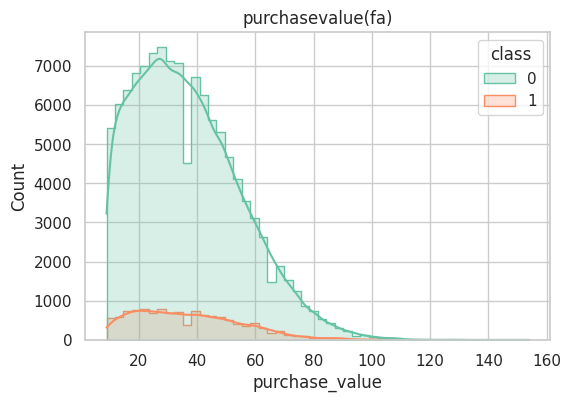

In [14]:
# ===== 3. 交易金额分布 =====
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='purchase_value', hue='class', bins=50, kde=True, element="step")
plt.title("purchasevalue(fa)")
plt.show()

欺诈和非欺诈都主要集中在 20~60 美元 区间。

欺诈交易在中低金额段（20~40 美元）比较集中，并没有出现在特别高金额区间。

👉 结论：说明欺诈者可能故意选择“不显眼”的金额来规避风控，而不是大额交易。

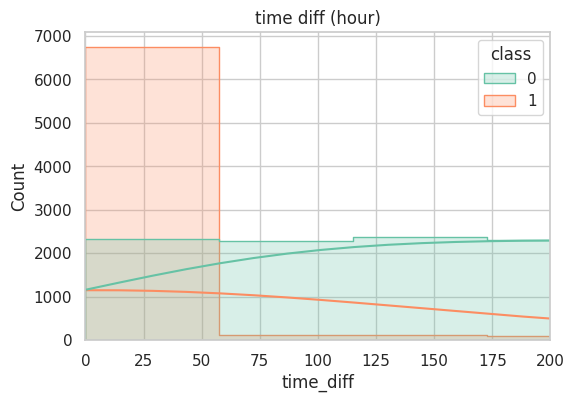

In [15]:
# ===== 4. 注册到购买时间差分布 =====
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='time_diff', hue='class', bins=50, kde=True, element="step")
plt.title("time diff (hour)")
plt.xlim(0, 200)  # 避免极端值影响显示，可以调整
plt.show()

非常明显：

欺诈用户大部分在注册后极短时间内（0~50小时内）就完成交易。

正常用户分布更均匀，有很多人是在注册后几天才发生第一次交易。

👉 结论：time_diff 是一个 强欺诈信号，注册即交易的用户风险非常高。

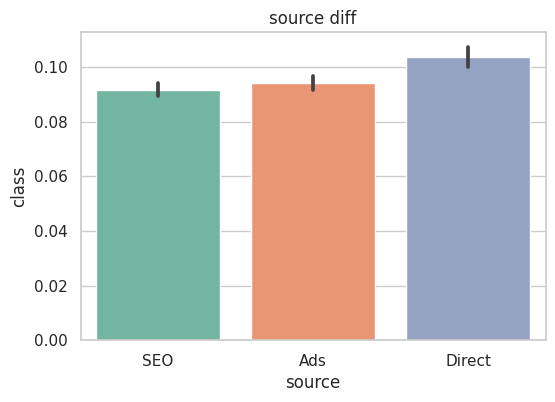

In [16]:
# ===== 5. 来源渠道的欺诈比例 =====
plt.figure(figsize=(6,4))
sns.barplot(x="source", y="class", data=df)
plt.title("source diff")
plt.show()

Direct 渠道的欺诈率最高（约 10%+）。

SEO 和 Ads 的欺诈率稍低一些。

👉 结论：通过 Direct 渠道来的用户（可能是直接输入网址或脚本模拟的）风险更高，而 Ads/SEO 渠道来的用户相对安全。

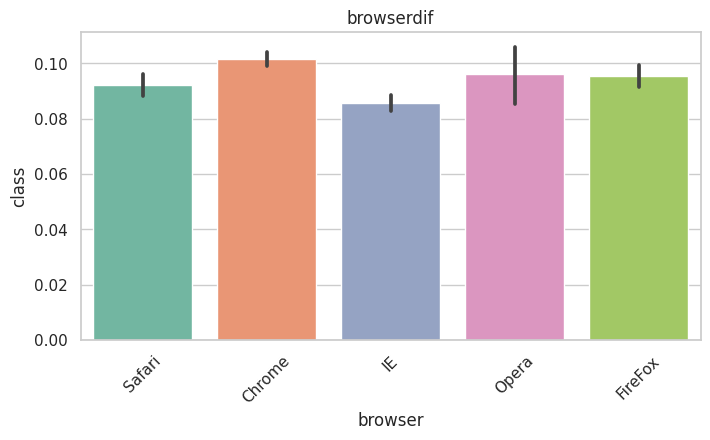

In [17]:
# ===== 6. 浏览器的欺诈比例 =====
plt.figure(figsize=(8,4))
sns.barplot(x="browser", y="class", data=df)
plt.title("browserdif")
plt.xticks(rotation=45)
plt.show()

欺诈率在不同浏览器间差异不大，大约在 8.5%~10%。

其中 Chrome 和 Firefox 用户的欺诈率略高。

👉 结论：浏览器不是决定性特征，但 Chrome 可能因为用户数量最多，所以也会包含更多欺诈案例。

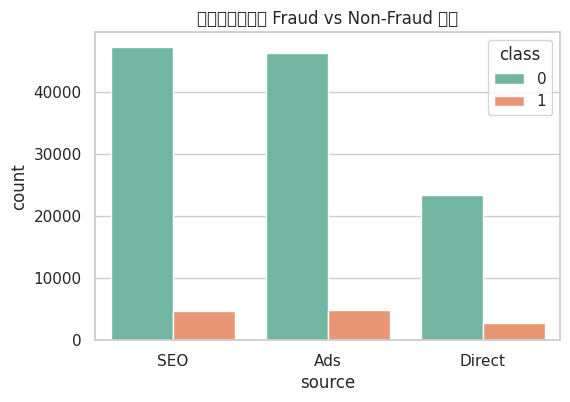

In [18]:
# 来源渠道 vs 欺诈/非欺诈数量
plt.figure(figsize=(6,4))
sns.countplot(x="source", hue="class", data=df)
plt.title("不同来源渠道的 Fraud vs Non-Fraud 分布")
plt.show()

从数量分布图可以看到：

SEO 和 Ads 渠道用户数量比较大，欺诈用户数量也不少。

Direct 渠道 用户总量较少，但欺诈用户占比相对更高。

从比例结果来看：

Direct 渠道的欺诈率最高 (10.5%)

SEO 渠道：约 8.9%

Ads 渠道：约 9.2%
👉 结论：Direct 渠道的用户更值得关注，可能是恶意脚本或直接输入网址绕过广告、SEO 的真实用户行为。

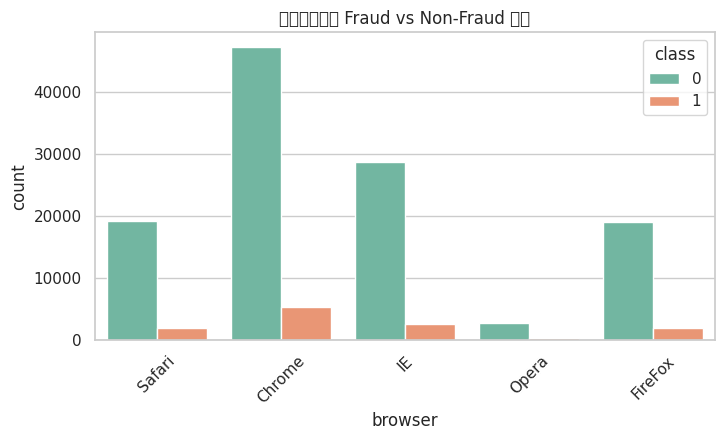

In [19]:
# 浏览器 vs 欺诈/非欺诈数量
plt.figure(figsize=(8,4))
sns.countplot(x="browser", hue="class", data=df)
plt.title("不同浏览器的 Fraud vs Non-Fraud 分布")
plt.xticks(rotation=45)
plt.show()

数量分布图可以看到：

Chrome 用户最多，欺诈用户数量也最大。

其他浏览器（IE, Safari, FireFox, Opera）数量差不多，欺诈量相对较少。

从比例结果来看：

FireFox 欺诈率最高 (9.5%)

Chrome 紧随其后 (9.9%)

Safari、Opera、IE 的欺诈率相对稍低 (~8.7% ~ 9.2%)
👉 结论：Chrome 因为用户基数大，欺诈数量最多；但 Firefox 在相对比例上风险更高。

In [20]:
# 计算不同来源渠道的欺诈比例
fraud_rate_by_source = df.groupby("source")["class"].mean()
print(fraud_rate_by_source)

# 计算不同浏览器的欺诈比例
fraud_rate_by_browser = df.groupby("browser")["class"].mean()
print(fraud_rate_by_browser)

source
Ads       0.093975
Direct    0.103564
SEO       0.091686
Name: class, dtype: float64
browser
Chrome     0.101503
FireFox    0.095369
IE         0.085640
Opera      0.096018
Safari     0.092151
Name: class, dtype: float64


# 下面开始特征工程

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129146 entries, 634 to 131728
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 129146 non-null  int64  
 1   purchase_value          129146 non-null  int64  
 2   device_id               129146 non-null  object 
 3   source                  129146 non-null  object 
 4   browser                 129146 non-null  object 
 5   sex                     129146 non-null  object 
 6   age                     129146 non-null  int64  
 7   ip_address              129146 non-null  float64
 8   class                   129146 non-null  int64  
 9   lower_bound_ip_address  129146 non-null  float64
 10  upper_bound_ip_address  129146 non-null  float64
 11  country                 129146 non-null  object 
 12  time_diff               129146 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 13.8+ MB


In [22]:
# ========== 1. device_id 特征 ==========
# 每个 device 被多少用户使用
device_user_count = df.groupby("device_id")["user_id"].nunique().rename("device_user_count")
device_purchase_count = df.groupby("device_id")["user_id"].count().rename("device_purchase_count")
df = df.merge(device_user_count, on="device_id", how="left")
df = df.merge(device_purchase_count, on="device_id", how="left")

# ========== 2. ip_address 特征 ==========
# 每个 IP 被多少用户使用
ip_user_count = df.groupby("ip_address")["user_id"].nunique().rename("ip_user_count")
ip_purchase_count = df.groupby("ip_address")["user_id"].count().rename("ip_purchase_count")

df = df.merge(ip_user_count, on="ip_address", how="left")
df = df.merge(ip_purchase_count, on="ip_address", how="left")

# ========== 3. country 特征 ==========
country_user_count = df.groupby("country")["user_id"].nunique().rename("country_user_count")
country_purchase_count = df.groupby("country")["user_id"].count().rename("country_purchase_count")

df = df.merge(country_user_count, on="country", how="left")
df = df.merge(country_purchase_count, on="country", how="left")

df = df.drop(columns=["device_id", "ip_address"])

In [23]:
df = df.drop(columns=["user_id", "lower_bound_ip_address","upper_bound_ip_address","user_id"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129146 entries, 0 to 129145
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   purchase_value          129146 non-null  int64  
 1   source                  129146 non-null  object 
 2   browser                 129146 non-null  object 
 3   sex                     129146 non-null  object 
 4   age                     129146 non-null  int64  
 5   class                   129146 non-null  int64  
 6   country                 129146 non-null  object 
 7   time_diff               129146 non-null  float64
 8   device_user_count       129146 non-null  int64  
 9   device_purchase_count   129146 non-null  int64  
 10  ip_user_count           129146 non-null  int64  
 11  ip_purchase_count       129146 non-null  int64  
 12  country_user_count      129146 non-null  int64  
 13  country_purchase_count  129146 non-null  int64  
dtypes: float64(1), int64

In [25]:
def cal_woe(df, feature, target):
    """
    计算指定特征的WOE值
    
    参数:
    df: 包含特征和目标变量的DataFrame
    feature: 特征列名
    target: 目标变量列名（0表示好样本，1表示坏样本）
    
    返回:
    woe_dict: 包含每个特征值对应WOE的字典
    """
    # 计算总好样本和总坏样本数量
    total_good = df[df[target] == 0].shape[0]
    total_bad = df[df[target] == 1].shape[0]
    
    # 计算每个特征值对应的好样本和坏样本数量
    woe_df = pd.crosstab(df[feature], df[target], margins=False)
    
    # 处理可能的0值，避免除以0
    woe_df = woe_df.rename(columns={0: 'good', 1: 'bad'})
    woe_df['good'] = woe_df['good'].replace(0, 0.0001)
    woe_df['bad'] = woe_df['bad'].replace(0, 0.0001)
    
    # 计算好样本占比和坏样本占比
    woe_df['good_rate'] = woe_df['good'] / total_good
    woe_df['bad_rate'] = woe_df['bad'] / total_bad
    
    # 计算WOE
    woe_df['woe'] = np.log(woe_df['good_rate'] / woe_df['bad_rate'])
    
    # 转换为字典返回
    woe_dict = woe_df['woe'].to_dict()
    
    return woe_dict

def cal_iv(df, feature, target):
    """
    计算指定特征的IV值
    
    参数:
    df: 包含特征和目标变量的DataFrame
    feature: 特征列名
    target: 目标变量列名（0表示好样本，1表示坏样本）
    
    返回:
    iv: 特征的IV值
    """
    # 计算总好样本和总坏样本数量
    total_good = df[df[target] == 0].shape[0]
    total_bad = df[df[target] == 1].shape[0]
    
    # 计算每个特征值对应的好样本和坏样本数量
    iv_df = pd.crosstab(df[feature], df[target], margins=False)
    
    # 处理可能的0值，避免除以0
    iv_df = iv_df.rename(columns={0: 'good', 1: 'bad'})
    iv_df['good'] = iv_df['good'].replace(0, 0.0001)
    iv_df['bad'] = iv_df['bad'].replace(0, 0.0001)
    
    # 计算好样本占比和坏样本占比
    iv_df['good_rate'] = iv_df['good'] / total_good
    iv_df['bad_rate'] = iv_df['bad'] / total_bad
    
    # 计算WOE和IV
    iv_df['woe'] = np.log(iv_df['good_rate'] / iv_df['bad_rate'])
    iv_df['iv'] = (iv_df['good_rate'] - iv_df['bad_rate']) * iv_df['woe']
    
    # 计算该特征的总IV值
    total_iv = iv_df['iv'].sum()
    
    return total_iv

def cal_iv_all(df, target, exclude_features=None):
    """
    计算数据集中所有特征的IV值，并按从高到低排序
    
    参数:
    df: 包含特征和目标变量的DataFrame
    target: 目标变量列名（0表示好样本，1表示坏样本）
    exclude_features: 需要排除的特征列表
    
    返回:
    iv_df: 包含特征名及其IV值的DataFrame，按IV值从高到低排序
    """
    # 确定需要计算IV的特征列表
    if exclude_features is None:
        exclude_features = []
    if target not in exclude_features:
        exclude_features.append(target)
    
    features = [col for col in df.columns if col not in exclude_features]
    
    # 计算每个特征的IV值
    iv_results = []
    for feature in features:
        iv_value = cal_iv(df, feature, target)
        iv_results.append({'feature': feature, 'iv': iv_value})
    
    # 转换为DataFrame并排序
    iv_df = pd.DataFrame(iv_results)
    iv_df = iv_df.sort_values(by='iv', ascending=False).reset_index(drop=True)
    
    return iv_df


In [26]:
# 计算所有特征的IV值
iv_table = cal_iv_all(df, 'class')

In [27]:
print(iv_table)

                   feature         iv
0                time_diff  23.183021
1        device_user_count   3.293754
2    device_purchase_count   3.293754
3            ip_user_count   2.931009
4        ip_purchase_count   2.931009
5                  country   0.101525
6       country_user_count   0.072741
7   country_purchase_count   0.072741
8           purchase_value   0.052795
9                      age   0.021626
10                 browser   0.005463
11                  source   0.002595
12                     sex   0.000711


In [28]:
df = df.drop(columns=['sex','source','browser','age'])

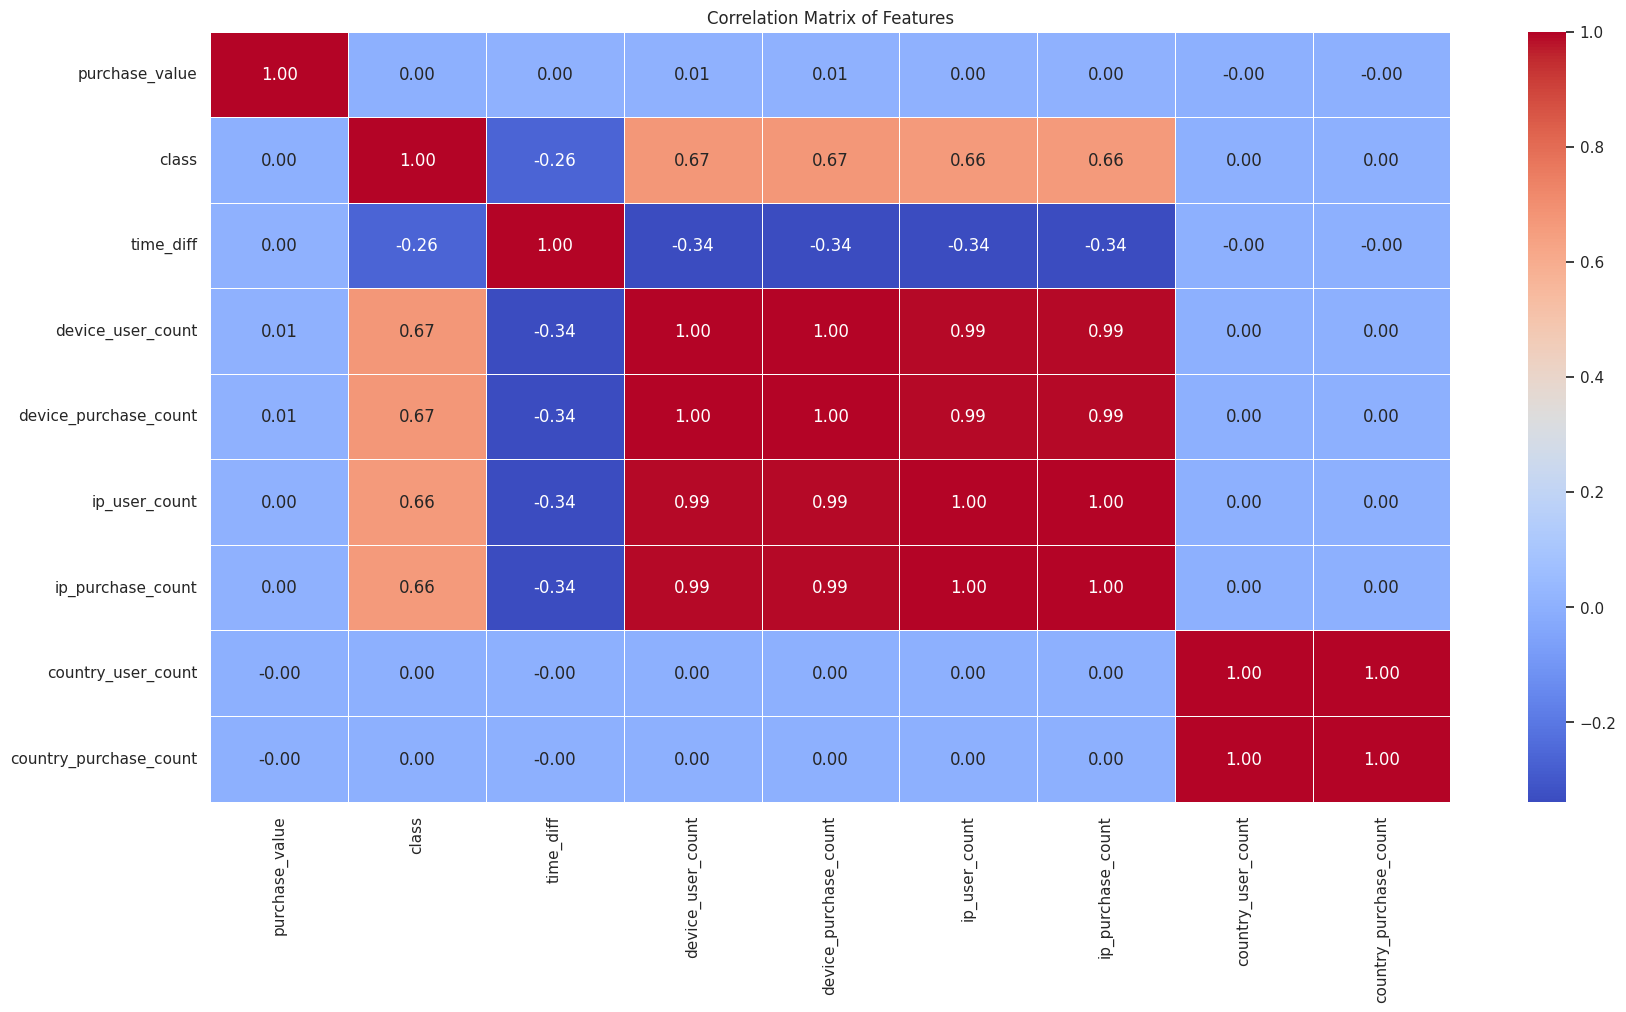

In [29]:
features_data = df.drop(columns=['country'])
# 计算相关性矩阵
correlation_matrix = features_data.corr()

# 使用 seaborn 创建热图
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [30]:
df = df.drop(columns=['country_purchase_count','device_purchase_count','ip_purchase_count'])

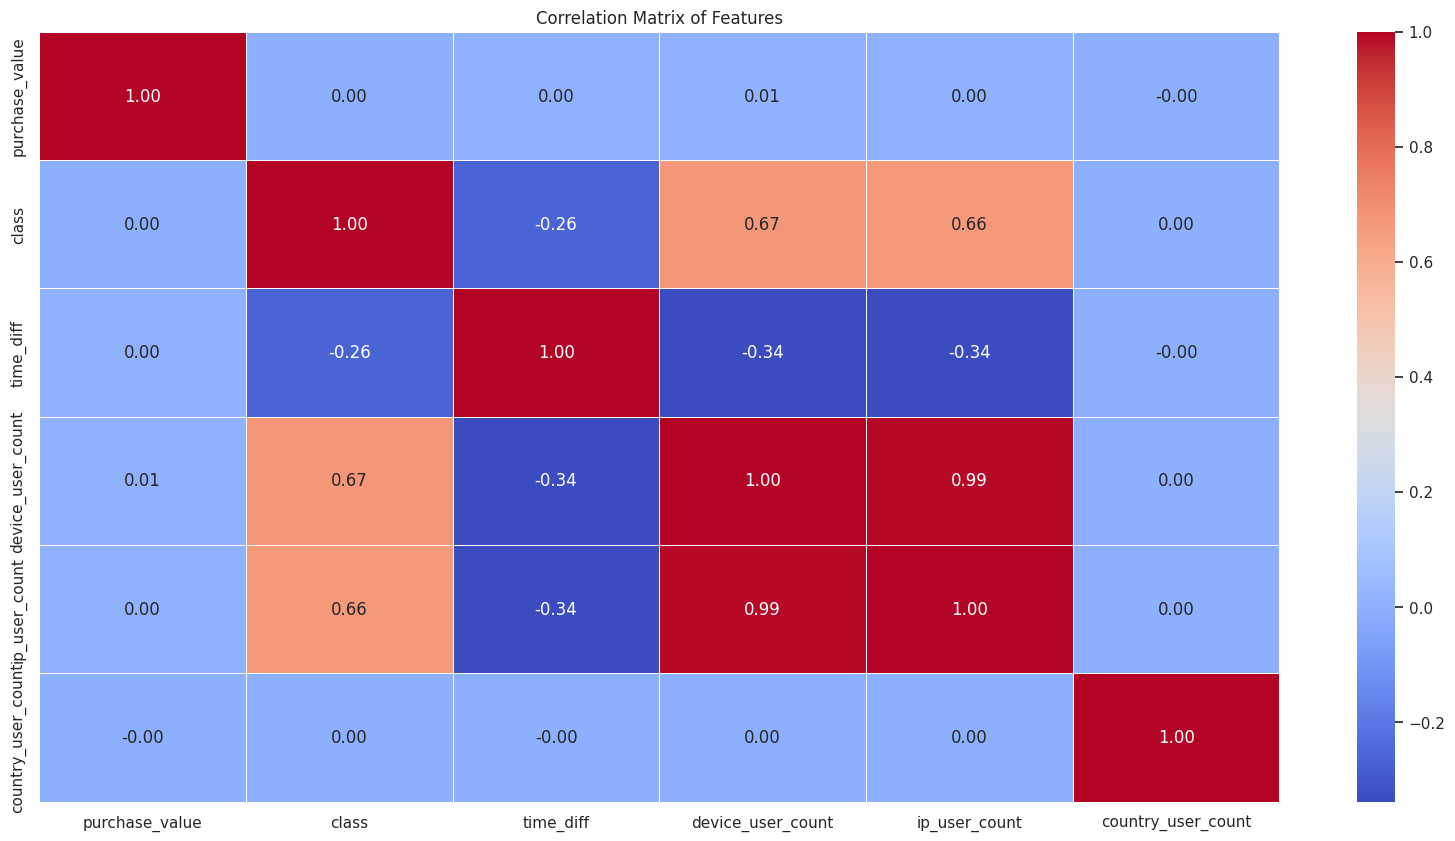

In [31]:
features_data = df.drop(columns=['country'])
# 计算相关性矩阵
correlation_matrix = features_data.corr()

# 使用 seaborn 创建热图
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [32]:
df = df.drop(columns='ip_user_count')

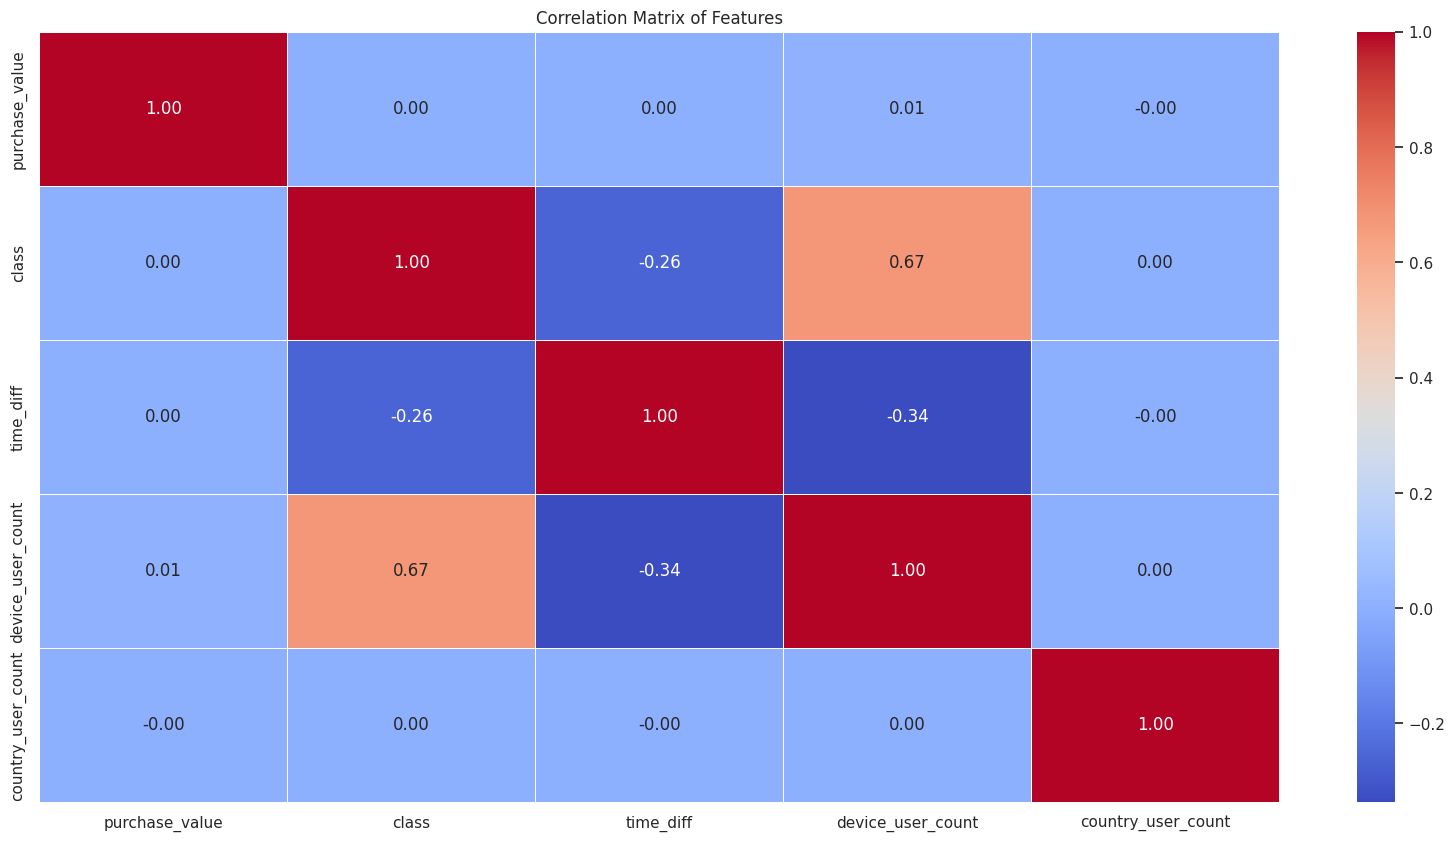

In [33]:
features_data = df.drop(columns=['country'])
# 计算相关性矩阵
correlation_matrix = features_data.corr()

# 使用 seaborn 创建热图
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [34]:
# 选择需要编码的类别特征
categorical_cols = ['country']

# 用 pd.get_dummies 做 One-Hot 编码
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [35]:
df_encoded.head()

,purchase_value,class,time_diff,device_user_count,country_user_count,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,47,0,1008.948611,1,1844,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15,0,342.121389,1,291,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,44,0,554.870556,2,12038,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,55,0,2122.471389,1,12038,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,51,0,2847.105278,1,291,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='class')
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)


# ===== 2. 训练 baseline 逻辑回归（代价敏感）=====
lr = LogisticRegression(
    max_iter=500,
    class_weight="balanced",   # 关键：缓解不平衡
    solver="liblinear",        # 稀疏/one-hot 时很稳
    n_jobs=None
)
lr.fit(X_train, y_train)

# ===== 3. 默认阈值(0.5)评估 =====
y_proba = lr.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc  = average_precision_score(y_test, y_proba)  # PR-AUC

In [38]:
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f} (baseline random ≈ {y_test.mean():.4f})\n")

print("=== 默认阈值(0.5) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

ROC-AUC: 0.8379
PR-AUC : 0.6785 (baseline random ≈ 0.0950)

=== 默认阈值(0.5) ===
[[23119   257]
 [ 1053  1401]]
              precision    recall  f1-score   support

           0      0.956     0.989     0.972     23376
           1      0.845     0.571     0.681      2454

    accuracy                          0.949     25830
   macro avg      0.901     0.780     0.827     25830
weighted avg      0.946     0.949     0.945     25830



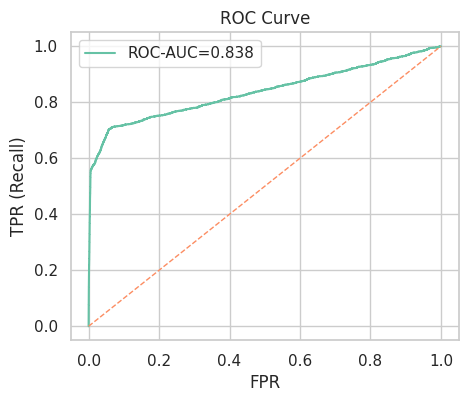

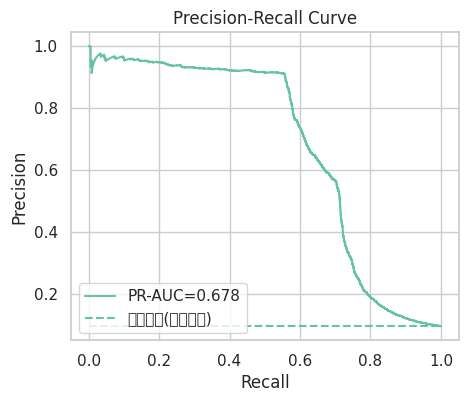

In [39]:
# ===== 4. 曲线可视化（ROC & PR）=====
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, th = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR (Recall)"); plt.title("ROC Curve"); plt.legend()
plt.show()

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.3f}")
plt.hlines(y=y_test.mean(), xmin=0, xmax=1, linestyles='--', label="随机基线(正例占比)")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall Curve"); plt.legend()
plt.show()

In [40]:
# ===== 5. 阈值调优：F2 最大点（偏召回）=====
beta = 2
f2 = (1+beta**2) * (prec*rec) / (beta**2*prec + rec + 1e-12)
best_idx = np.nanargmax(f2)
best_th  = th[best_idx]
print(f"\nF2 最大点阈值: {best_th:.4f} | P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")


F2 最大点阈值: 0.4099 | P=0.562, R=0.704


In [41]:
y_pred_f2 = (y_proba >= best_th).astype(int)
print("=== F2* 最优阈值下 ===")
print(confusion_matrix(y_test, y_pred_f2))
print(classification_report(y_test, y_pred_f2, digits=3))

=== F2* 最优阈值下 ===
[[22031  1345]
 [  727  1727]]
              precision    recall  f1-score   support

           0      0.968     0.942     0.955     23376
           1      0.562     0.704     0.625      2454

    accuracy                          0.920     25830
   macro avg      0.765     0.823     0.790     25830
weighted avg      0.929     0.920     0.924     25830



In [42]:
# ===== 6. 业务约束阈值：在 Precision≥p0 时，Recall 最大 =====
p0 = 0.20  # 例：人工复核能接受的最低精度线，可按需调整
mask = prec[:-1] >= p0
if mask.any():
    idx_c = np.argmax(rec[:-1] * mask)
    th_c  = th[idx_c]
    print(f"\n业务约束(Precision≥{p0:.2f}) 阈值: {th_c:.4f} | P={prec[idx_c]:.3f}, R={rec[idx_c]:.3f}")
    y_pred_c = (y_proba >= th_c).astype(int)
    print("=== 业务约束阈值下 ===")
    print(confusion_matrix(y_test, y_pred_c))
    print(classification_report(y_test, y_pred_c, digits=3))
else:
    print(f"\n在当前模型下，Precision≥{p0:.2f} 的点不存在（要求过高或模型偏弱），建议先放宽或提升模型。")


业务约束(Precision≥0.20) 阈值: 0.2896 | P=0.200, R=0.791
=== 业务约束阈值下 ===
[[15608  7768]
 [  512  1942]]
              precision    recall  f1-score   support

           0      0.968     0.668     0.790     23376
           1      0.200     0.791     0.319      2454

    accuracy                          0.679     25830
   macro avg      0.584     0.730     0.555     25830
weighted avg      0.895     0.679     0.746     25830



In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix,
    classification_report
)

from sklearn.metrics import make_scorer, fbeta_score

# feature_names = df_encoded.drop(columns=["class"]).columns.tolist()

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",              # 对高维 one-hot 更稳
    class_weight="balanced_subsample",# 关键：按每棵树的bootstrap分布做类权重
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# ======================
# 2) 默认阈值(0.5)评估
# ======================
y_proba = rf.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc  = average_precision_score(y_test, y_proba)


print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f} (random baseline ≈ {y_test.mean():.4f})\n")

print("=== 默认阈值(0.5) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


# # ========== 6. 特征重要性 ==========
# importances = rf.feature_importances_
# fi = pd.DataFrame({"feature": feature_names, "importance": importances})
# fi = fi.sort_values("importance", ascending=False).head(25)
# print("\nTop-25 Feature Importances:\n", fi.to_string(index=False))

ROC-AUC: 0.8252
PR-AUC : 0.6790 (random baseline ≈ 0.0950)

=== 默认阈值(0.5) ===
[[22914   462]
 [ 1043  1411]]
              precision    recall  f1-score   support

           0      0.956     0.980     0.968     23376
           1      0.753     0.575     0.652      2454

    accuracy                          0.942     25830
   macro avg      0.855     0.778     0.810     25830
weighted avg      0.937     0.942     0.938     25830



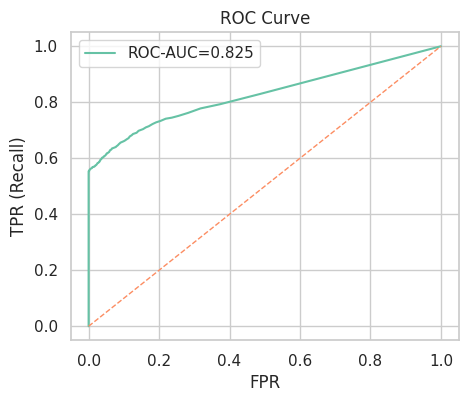

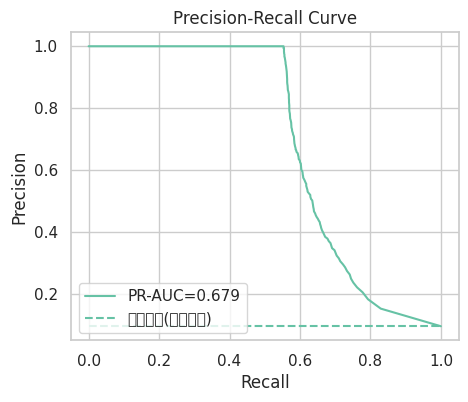

In [44]:
# ======================
# 3) 曲线（ROC / PR）
# ======================
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, th = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR (Recall)")
plt.title("ROC Curve"); plt.legend()
plt.show()

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.3f}")
plt.hlines(y=y_test.mean(), xmin=0, xmax=1, linestyles='--', label="随机基线(正例占比)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend()
plt.show()

In [45]:
# ======================
# 4) F2 阈值调优（召回更重要）
# ======================
beta = 2
f2 = (1+beta**2) * (prec*rec) / (beta**2*prec + rec + 1e-12)
best_idx = np.nanargmax(f2)
best_th  = th[best_idx]
print(f"\nF2 最大点阈值: {best_th:.4f} | P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")

y_pred_f2 = (y_proba >= best_th).astype(int)
print("=== F2* 最优阈值下 ===")
print(confusion_matrix(y_test, y_pred_f2))
print(classification_report(y_test, y_pred_f2, digits=3))


F2 最大点阈值: 0.6200 | P=0.918, R=0.562
=== F2* 最优阈值下 ===
[[23253   123]
 [ 1074  1380]]
              precision    recall  f1-score   support

           0      0.956     0.995     0.975     23376
           1      0.918     0.562     0.697      2454

    accuracy                          0.954     25830
   macro avg      0.937     0.779     0.836     25830
weighted avg      0.952     0.954     0.949     25830



In [46]:
# ======================
# 5) 业务约束阈值：Precision ≥ p0 时，Recall 最大
# ======================
p0 = 0.20  # 例如：人工复核最低命中率 20%
mask = prec[:-1] >= p0
if mask.any():
    idx_c = np.argmax(rec[:-1] * mask)
    th_c  = th[idx_c]
    print(f"\n业务约束(Precision≥{p0:.2f}) 阈值: {th_c:.4f} | P={prec[idx_c]:.3f}, R={rec[idx_c]:.3f}")
    y_pred_c = (y_proba >= th_c).astype(int)
    print("=== 业务约束阈值下 ===")
    print(confusion_matrix(y_test, y_pred_c))
    print(classification_report(y_test, y_pred_c, digits=3))
else:
    print(f"\n在当前模型下，Precision≥{p0:.2f} 的点不存在；可放宽 p0 或先提升模型能力。")


业务约束(Precision≥0.20) 阈值: 0.0150 | P=0.205, R=0.778
=== 业务约束阈值下 ===
[[15952  7424]
 [  545  1909]]
              precision    recall  f1-score   support

           0      0.967     0.682     0.800     23376
           1      0.205     0.778     0.324      2454

    accuracy                          0.691     25830
   macro avg      0.586     0.730     0.562     25830
weighted avg      0.895     0.691     0.755     25830



In [47]:
from xgboost import XGBClassifier



# 计算不平衡权重（负/正）
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
spw = neg / max(pos, 1)   # ≈ 9.5 左右

print(f"scale_pos_weight ≈ {spw:.2f}  | pos%={pos/(pos+neg):.4f}")


xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="aucpr",         # 不平衡更关注 PR-AUC
    n_estimators=200,           # 配合早停，多给点上限
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    reg_alpha=0.0,
    scale_pos_weight=spw,        # 关键：缓解不平衡
    tree_method="hist",          # 更快
    n_jobs=-1,
    random_state=42
)

xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False,
    early_stopping_rounds=100
)

# ======================
# 2) 默认阈值(0.5)评估
# ======================
y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred  = (y_proba >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc  = average_precision_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f} (random baseline ≈ {y_test.mean():.4f})\n")

print("=== 默认阈值(0.5) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

# # ===== 5) 特征重要性（Top-25）=====
# importances = xgb.feature_importances_          # gain-based importance
# fi = (pd.DataFrame({"feature": feature_names, "importance": importances})
#         .sort_values("importance", ascending=False)
#         .head(25))
# print("\nTop-25 Feature Importances:\n", fi.to_string(index=False))

scale_pos_weight ≈ 9.53  | pos%=0.0950
ROC-AUC: 0.8432
PR-AUC : 0.6892 (random baseline ≈ 0.0950)

=== 默认阈值(0.5) ===
[[22139  1237]
 [  732  1722]]
              precision    recall  f1-score   support

           0      0.968     0.947     0.957     23376
           1      0.582     0.702     0.636      2454

    accuracy                          0.924     25830
   macro avg      0.775     0.824     0.797     25830
weighted avg      0.931     0.924     0.927     25830



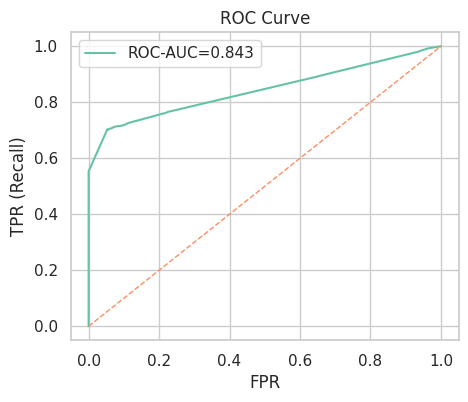

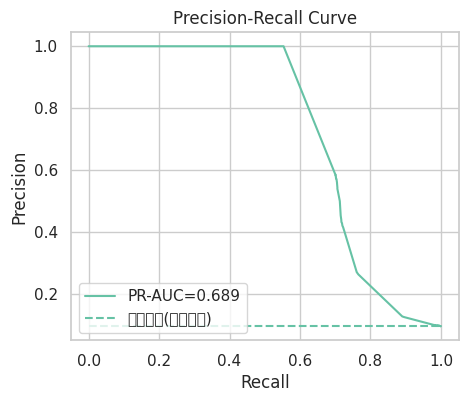

In [48]:
# ======================
# 3) 曲线（ROC / PR）
# ======================
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, th = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR (Recall)")
plt.title("ROC Curve"); plt.legend()
plt.show()

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.3f}")
plt.hlines(y=y_test.mean(), xmin=0, xmax=1, linestyles='--', label="随机基线(正例占比)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend()
plt.show()

In [49]:
# ======================
# 4) F2 阈值调优（召回更重要）
# ======================
beta = 2
f2 = (1+beta**2) * (prec*rec) / (beta**2*prec + rec + 1e-12)
best_idx = np.nanargmax(f2)
best_th  = th[best_idx]
print(f"\nF2 最大点阈值: {best_th:.4f} | P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")

y_pred_f2 = (y_proba >= best_th).astype(int)
print("=== F2* 最优阈值下 ===")
print(confusion_matrix(y_test, y_pred_f2))
print(classification_report(y_test, y_pred_f2, digits=3))


F2 最大点阈值: 0.5215 | P=0.585, R=0.701
=== F2* 最优阈值下 ===
[[22156  1220]
 [  734  1720]]
              precision    recall  f1-score   support

           0      0.968     0.948     0.958     23376
           1      0.585     0.701     0.638      2454

    accuracy                          0.924     25830
   macro avg      0.776     0.824     0.798     25830
weighted avg      0.932     0.924     0.927     25830



In [50]:
# ======================
# 5) 业务约束阈值：Precision ≥ p0 时 Recall 最大
# ======================
p0 = 0.20  # 例如人工复核最低命中率 20%
mask = prec[:-1] >= p0
if mask.any():
    idx_c = np.argmax(rec[:-1] * mask)
    th_c  = th[idx_c]
    print(f"\n业务约束(Precision≥{p0:.2f}) 阈值: {th_c:.4f} | P={prec[idx_c]:.3f}, R={rec[idx_c]:.3f}")
    y_pred_c = (y_proba >= th_c).astype(int)
    print("=== 业务约束阈值下 ===")
    print(confusion_matrix(y_test, y_pred_c))
    print(classification_report(y_test, y_pred_c, digits=3))
else:
    print(f"\nPrecision≥{p0:.2f} 的点不存在；可放宽 p0 或先提升模型能力。")


业务约束(Precision≥0.20) 阈值: 0.4640 | P=0.263, R=0.766
=== 业务约束阈值下 ===
[[18099  5277]
 [  575  1879]]
              precision    recall  f1-score   support

           0      0.969     0.774     0.861     23376
           1      0.263     0.766     0.391      2454

    accuracy                          0.773     25830
   macro avg      0.616     0.770     0.626     25830
weighted avg      0.902     0.773     0.816     25830



In [51]:
from lightgbm import LGBMClassifier

from lightgbm.callback import early_stopping, log_evaluation




# 负/正样本比，用于不平衡权重
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
spw = neg / max(pos, 1)
print(f"scale_pos_weight ≈ {spw:.2f} | pos%={pos/(pos+neg):.4f}")


lgb = LGBMClassifier(
    objective="binary",
    n_estimators=200,          # 上限大一些，配合早停
    learning_rate=0.05,
    # num_leaves=63,
    max_depth=3,
    min_child_samples=10,
    subsample=0.6,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    # 二选一：is_unbalance 或 scale_pos_weight
    # is_unbalance=True,
    scale_pos_weight=spw,       # 推荐明确指定
    n_jobs=-1,
    random_state=42
)

Xtr = X_train.values
Xte = X_test.values

lgb.fit(
    Xtr, y_train,
    eval_set=[(Xtr, y_train), (Xte, y_test)],
    eval_metric=["aucpr", "auc"],
    callbacks=[early_stopping(100, verbose=False), log_evaluation(100)]
)
y_proba = lgb.predict_proba(Xte)[:, 1]

# ======================
# 2) 默认阈值(0.5)评估
# ======================
y_pred  = (y_proba >= 0.5).astype(int)

roc_auc = roc_auc_score(y_test, y_proba)
pr_auc  = average_precision_score(y_test, y_proba)
print(f"\nROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC : {pr_auc:.4f} (random baseline ≈ {y_test.mean():.4f})\n")

print("=== 默认阈值(0.5) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))



scale_pos_weight ≈ 9.53 | pos%=0.0950
[LightGBM] [Info] Number of positive: 9814, number of negative: 93502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 727
[LightGBM] [Info] Number of data points in the train set: 103316, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094990 -> initscore=-2.254173
[LightGBM] [Info] Start training from score -2.254173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

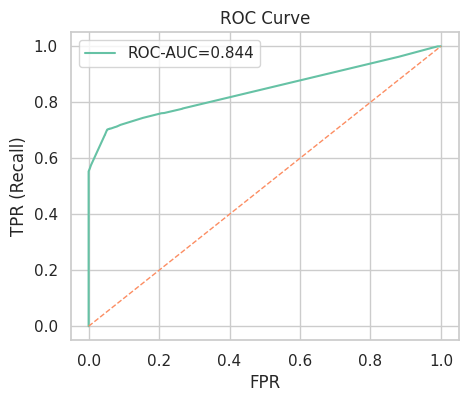

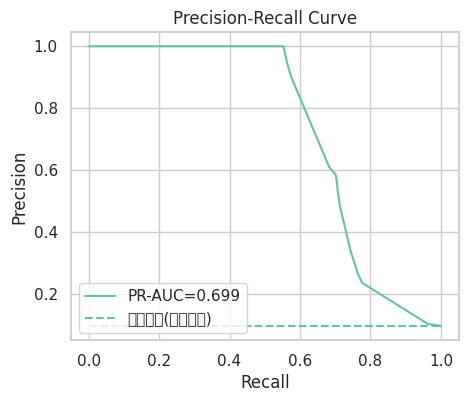

In [52]:
# ======================
# 3) ROC / PR 曲线
# ======================
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, th = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR (Recall)")
plt.title("ROC Curve"); plt.legend()
plt.show()

plt.figure(figsize=(5,4))
plt.plot(rec, prec, label=f"PR-AUC={pr_auc:.3f}")
plt.hlines(y=y_test.mean(), xmin=0, xmax=1, linestyles='--', label="随机基线(正例占比)")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision-Recall Curve"); plt.legend()
plt.show()

In [53]:
# ======================
# 4) F2 阈值调优（召回优先）
# ======================
beta = 2
f2 = (1+beta**2) * (prec*rec) / (beta**2*prec + rec + 1e-12)
best_idx = np.nanargmax(f2)
best_th  = th[best_idx]
print(f"\nF2 最大点阈值: {best_th:.4f} | P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f}")

y_pred_f2 = (y_proba >= best_th).astype(int)
print("=== F2* 最优阈值下 ===")
print(confusion_matrix(y_test, y_pred_f2))
print(classification_report(y_test, y_pred_f2, digits=3))


F2 最大点阈值: 0.2615 | P=0.583, R=0.702
=== F2* 最优阈值下 ===
[[22146  1230]
 [  732  1722]]
              precision    recall  f1-score   support

           0      0.968     0.947     0.958     23376
           1      0.583     0.702     0.637      2454

    accuracy                          0.924     25830
   macro avg      0.776     0.825     0.797     25830
weighted avg      0.931     0.924     0.927     25830



In [54]:
# ======================
# 5) 业务约束阈值：Precision ≥ p0 时 Recall 最大
# ======================
p0 = 0.20   # 例如人工复核最低命中率 20%
mask = prec[:-1] >= p0
if mask.any():
    idx_c = np.argmax(rec[:-1] * mask)
    th_c  = th[idx_c]
    print(f"\n业务约束(Precision≥{p0:.2f}) 阈值: {th_c:.4f} | P={prec[idx_c]:.3f}, R={rec[idx_c]:.3f}")
    y_pred_c = (y_proba >= th_c).astype(int)
    print("=== 业务约束阈值下 ===")
    print(confusion_matrix(y_test, y_pred_c))
    print(classification_report(y_test, y_pred_c, digits=3))
else:
    print(f"\nPrecision≥{p0:.2f} 的点不存在；可放宽 p0 或先提升模型能力。")


业务约束(Precision≥0.20) 阈值: 0.1470 | P=0.235, R=0.778
=== 业务约束阈值下 ===
[[17153  6223]
 [  546  1908]]
              precision    recall  f1-score   support

           0      0.969     0.734     0.835     23376
           1      0.235     0.778     0.361      2454

    accuracy                          0.738     25830
   macro avg      0.602     0.756     0.598     25830
weighted avg      0.899     0.738     0.790     25830

